## Observations and Insights

## Dependencies and starter code

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
complete_data = pd.merge(study_results, mouse_metadata, how="left")
complete_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary statistics

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen = complete_data.groupby('Drug Regimen')

drug_mean = drug_regimen.mean()["Tumor Volume (mm3)"]
drug_median = drug_regimen.median()["Tumor Volume (mm3)"]
drug_variance = drug_regimen.var()["Tumor Volume (mm3)"]
drug_std = drug_regimen.std()["Tumor Volume (mm3)"]
drug_sem = drug_regimen.sem()["Tumor Volume (mm3)"]

summary_stats = pd.DataFrame({
                            "Mean Tumor vol": drug_mean,
                            "Media Tumor vol": drug_median,
                            "Variance Tumor vol": drug_variance,
                            "STD Tumor vol": drug_std,
                            "SEM Tumor vol": drug_sem
                            })

summary_stats

,Mean Tumor vol,Media Tumor vol,Variance Tumor vol,STD Tumor vol,SEM Tumor vol
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

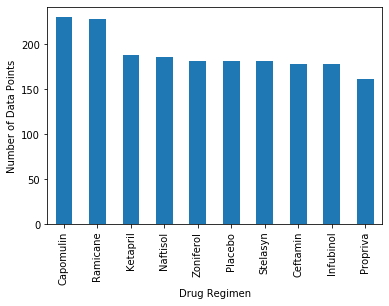

In [12]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
count = complete_data["Drug Regimen"].value_counts()

count.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.show()

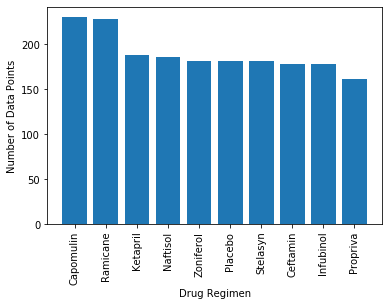

In [15]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

plt.bar(count.index.values,count.values)

plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Data Points")
plt.show()

## Pie plots

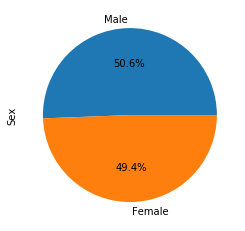

In [54]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = complete_data['Sex'].value_counts()

gender_count.plot(kind="pie",autopct='%1.1f%%')
plt.show()

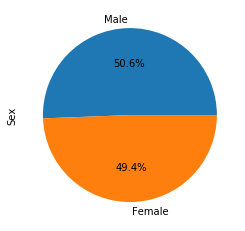

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_count.values,labels=gender_count.index.values,autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, outliers and boxplots

In [30]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
best_treatment = complete_data.groupby("Drug Regimen")
best_treatment = best_treatment["Tumor Volume (mm3)"].max().sort_values(ascending=True)
best_treatment

#Best treatment is [ramicane, capomulin, ceftamin ,infubinol]

max_tumor = complete_data.groupby(["Mouse ID"]).max()
max_tumor = max_tumor.reset_index()

merged_data = max_tumor[["Mouse ID","Timepoint"]].merge(complete_data,on=['Mouse ID','Timepoint'])
merged_data


ramicane = merged_data.loc[merged_data["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"]
capomulin = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]
ceftamin = merged_data.loc[merged_data["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"]
infubinol = merged_data.loc[merged_data["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"]

#Ramicane
ramicane_quart = ramicane.quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quart[0.25]
ramicane_upperq = ramicane_quart[0.75]
ramicane_iqr =  ramicane_upperq - ramicane_lowerq
ramicane_lowerbound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upperbound = ramicane_upperq + (1.5*ramicane_iqr)

#Capomulin
capomulin_quart = capomulin.quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quart[0.25]
capomulin_upperq = capomulin_quart[0.75]
capomulin_iqr =  capomulin_upperq - capomulin_lowerq
capomulin_lowerbound = capomulin_lowerq - (1.5*capomulin_iqr)
capomulin_upperbound = capomulin_upperq + (1.5*capomulin_iqr)

#Ceftamin
ceftamin_quart = ceftamin.quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quart[0.25]
ceftamin_upperq = ceftamin_quart[0.75]
ceftamin_iqr =  ceftamin_upperq - ceftamin_lowerq
ceftamin_lowerbound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upperbound = ceftamin_upperq + (1.5*ceftamin_iqr)

#Infubinol
infubinol_quart = infubinol.quantile([.25,.5,.75])
infubinol_lowerq = infubinol_quart[0.25]
infubinol_upperq = infubinol_quart[0.75]
infubinol_iqr =  infubinol_upperq - infubinol_lowerq
infubinol_lowerbound = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upperbound = infubinol_upperq + (1.5*infubinol_iqr)

print(f"Ramicane Outliers: {ramicane.loc[(ramicane < ramicane_lowerbound) | (ramicane > ramicane_upperbound)]}")
print(f"Capomulin Outliers: {capomulin.loc[(capomulin < capomulin_lowerbound) | (capomulin > capomulin_upperbound)]}")
print(f"Ceftamin Outliers: {ceftamin.loc[(ceftamin < ceftamin_lowerbound) | (ceftamin > ceftamin_upperbound)]}")
print(f"Infubinol Outliers: {infubinol.loc[(infubinol < infubinol_lowerbound) | (infubinol > infubinol_upperbound)]}")

Ramicane Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Capomulin Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol Outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64


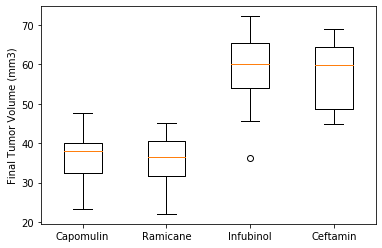

In [31]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot([capomulin,ramicane,infubinol,ceftamin],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'])
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and scatter plots

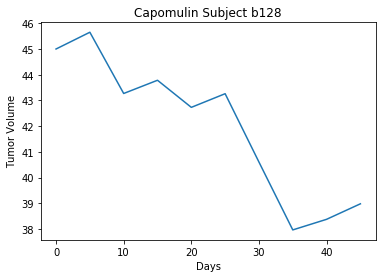

In [32]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_table = complete_data.loc[complete_data['Drug Regimen'] == "Capomulin"]

capomulin_sample = capomulin_table.loc[capomulin_table['Mouse ID']== 'b128']
plt.plot(capomulin_sample['Timepoint'],capomulin_sample['Tumor Volume (mm3)'])
plt.xlabel('Days')
plt.ylabel('Tumor Volume')
plt.title('Capomulin Subject b128')
plt.show()

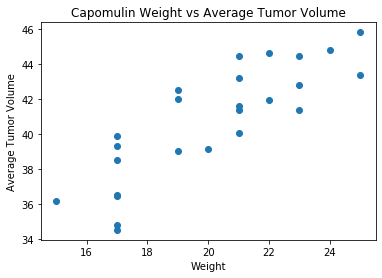

In [33]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_avg = capomulin_table.groupby(['Mouse ID']).mean()

plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume')
plt.title('Capomulin Weight vs Average Tumor Volume')
plt.show()

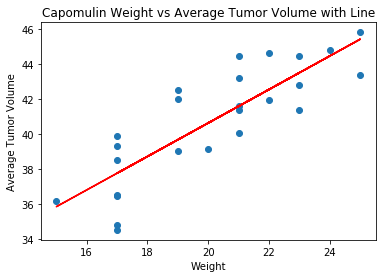

In [34]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])[0]

line_reg =  st.linregress(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
y_axis = capomulin_avg['Weight (g)']*line_reg[0]+line_reg[1]

plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
plt.plot(capomulin_avg['Weight (g)'],y_axis, color="red")
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume')
plt.title('Capomulin Weight vs Average Tumor Volume with Line')

plt.show()